## 1. User Input

In [1]:
%load_ext autoreload

%autoreload 2

In [2]:
demo_run = False

## 2. Downloading Robinhood orders
It will prompt MFA (if you have it enabled). Run again if you want refreshed Robinhood data.

In [3]:
import pandas as pd
import numpy as np

In [4]:
from pyrh import Robinhood

def login_rh(demo_run):
    if not demo_run:
        print('logging you in:')
        client = Robinhood()
        client.login()
    else:
        client = None
    
    return client

client= login_rh(demo_run)

logging you in:


TypeError: __init__() missing 2 required positional arguments: 'username' and 'password'

In [8]:
from backend.robinhood_data import RobinhoodData
rh = RobinhoodData('data/', client)
if demo_run:
    demo_orders = rh.demo_orders()
    demo_dividends= rh.demo_dividends()
else:
    demo_orders = None
    demo_dividends= None
dividends, orders, open_positions, closed_positions = rh.download(demo_orders, demo_dividends)

NameError: name 'client' is not defined

In [5]:
print(client)

None


## 3. Download stock prices and market index
Rerun if you want fresh market data

In [7]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

from backend.market_data import download_save_market_data

market = download_save_market_data(
    api_key=api_key,
    symbols=orders.symbol.unique(),
    start_date=orders.date.min(),
    end_date=pd.Timestamp("today", tz='UTC'))

NameError: name 'api_key' is not defined

## 4. Portfolio Models

In [7]:
from backend.portfolio_models import PortfolioModels
import empyrical as emp

In [8]:
# main calculations section
ptf = PortfolioModels('data')
summary = ptf.portfolio_summary()
stocks = ptf.stocks_risk()
df_corr, df_cov = ptf.stocks_correlation()
ptf_stats = ptf.portfolio_stats()
markowitz = ptf.markowitz_portfolios()
investment, dividends = ptf.portfolio_returns()

## 5. Results

### 5.1 Portfolio summary

In [9]:
summary

Shares Portfolio weight Current cost basis Current value  \
symbol                                                               
AAPL         100           29.04%          10,000.00     38,823.00   
BA           100           13.46%          10,000.00     17,996.00   
BAC          100            1.81%          10,000.00      2,414.00   
BND          100            6.63%          10,000.00      8,869.00   
CAT          100           10.24%          10,000.00     13,688.00   
CVX          100            6.61%          10,000.00      8,835.00   
JPM          100            7.35%          10,000.00      9,821.00   
MSFT          80           12.47%           8,000.00     16,668.00   
SPY            0            0.00%               0.00          0.00   
TIF          100            9.11%          10,000.00     12,174.00   
XOM          100            3.30%          10,000.00      4,407.00   
Portfolio    980          100.00%          98,000.00    133,695.00   

          Realized P/L Dividends Unrealized P/L Total return Total return rate  
symbol                                                                          
AAPL              0.00     30.00      28,823.00    28,853.00           288.53%  
BA                0.00     80.00       7,996.00     8,076.00            80.76%  
BAC               0.00    100.00      -7,586.00    -7,486.00           -74.86%  
BND               0.00     60.00      -1,131.00    -1,071.00           -10.71%  
CAT               0.00     70.00       3,688.00     3,758.00            37.58%  
CVX               0.00     40.00      -1,165.00    -1,125.00           -11.25%  
JPM               0.00    110.00        -179.00       -69.00            -0.69%  
MSFT            400.00     20.00       8,668.00     9,088.00           113.60%  
SPY               0.00      0.00           0.00         0.00            -0.69%  
TIF               0.00     90.00       2,174.00     2,264.00            22.64%  
XOM               0.00     50.00      -5,593.00    -5,543.00           -55.43%  
Portfolio       400.00    650.00      35,695.00    36,745.00            37.49%

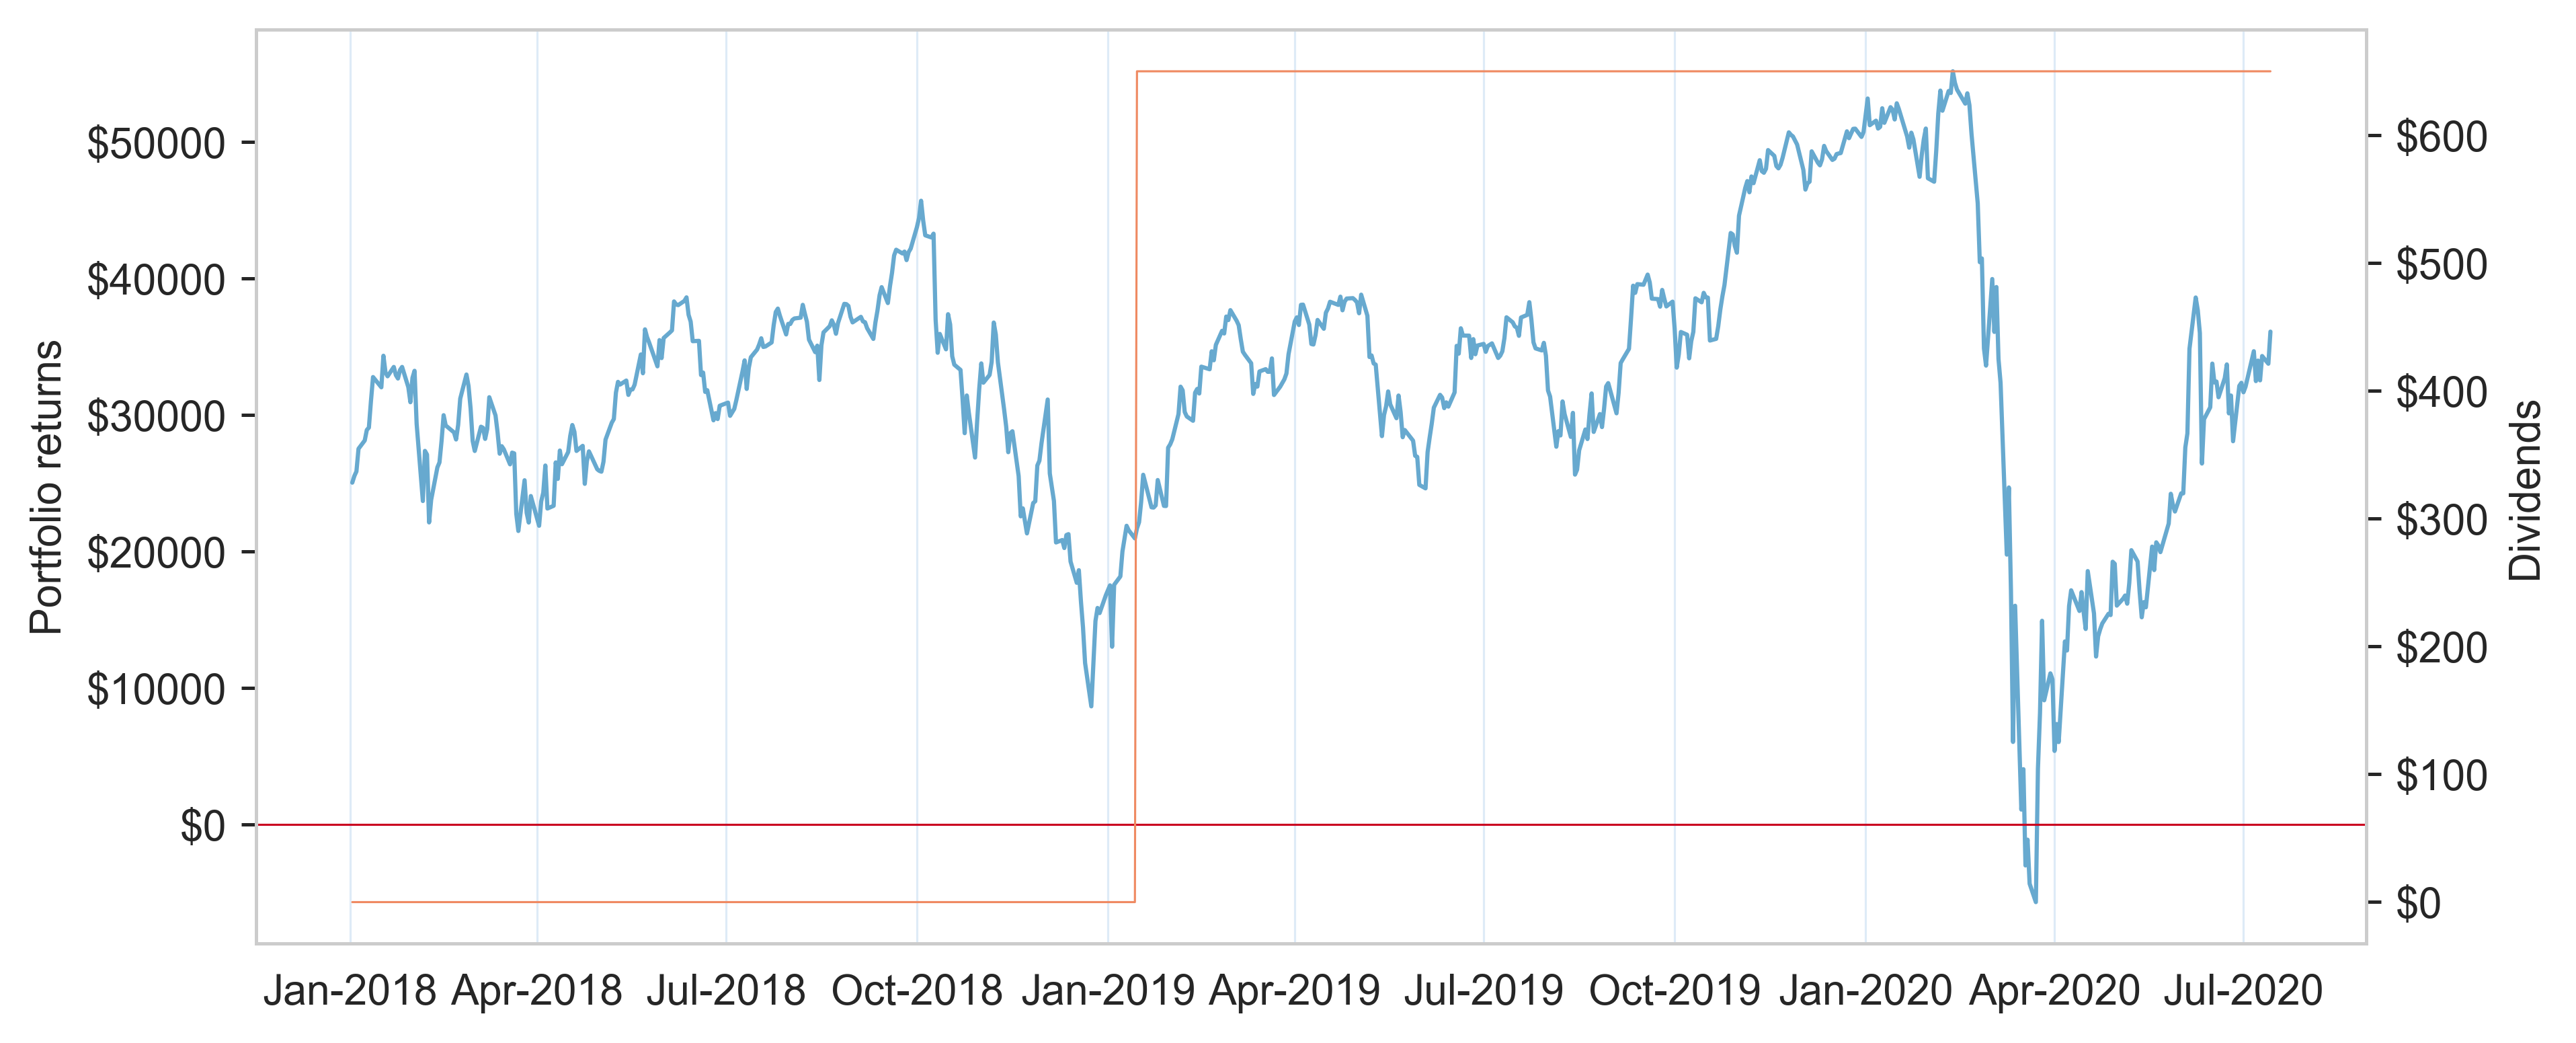

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.dates as mdates
sns.set_style("whitegrid")
MY_DPI = 450

f, ax1 = plt.subplots(figsize=(9, 4), dpi=MY_DPI)
ax2 = ax1.twinx()

ax1.plot(investment, linewidth=1, color='#67a9cf')
ax1.axhline(y=0, color='#ca0020', linestyle='-', linewidth=0.5)
ax1.set_ylabel("Portfolio returns")

ax2.plot(dividends, linewidth=0.5, color='#ef8a62')
ax2.set_ylabel("Dividends")

# format y-axis
ax1.get_yaxis().set_major_formatter(
    ticker.FuncFormatter(lambda x, p: '${:.0f}'.format(x)))

ax2.get_yaxis().set_major_formatter(
    ticker.FuncFormatter(lambda x, p: '${:.0f}'.format(x)))

# format dates and grids
date_fmt = mdates.DateFormatter('%b-%Y')
ax1.xaxis.set_major_formatter(date_fmt)

ax1.grid(False, axis='both', linestyle='-', linewidth=0.5, color="#deebf7")
ax1.grid(b=None, axis='y')

ax2.grid(False, axis='both', linestyle='-', linewidth=0.5, color="#deebf7")
ax2.grid(b=None, axis='y')

plt.show()

### 5.2 Portfolio Stats

In [11]:
ptf_stats

Total return           0.374949
Market return          0.186591
Annual return         -0.016760
Annual volatility      0.341516
Sharpe ratio           0.124115
Calmar ratio          -0.034203
Stability              0.060215
Max drawdown          -0.490007
Omega ratio            1.024068
Sortino ratio          0.163251
Skew                  -1.082623
Kurtosis               9.264294
Tail ratio             0.859260
Daily value at risk   -0.031676
Alpha                 -0.052195
Beta                   1.300359
dtype: float64

### 5.3 Stocks performance

In [12]:
stocks

Annual return  Annual volatility  Sharpe ratio  Calmar ratio  \
symbol                                                                 
AAPL         0.226396           0.342056      0.769797      0.538901   
BA          -0.422184           0.587732     -0.622644     -0.494355   
BAC         -0.217185           0.399469     -0.409566     -0.378743   
BND          0.030548           0.064281      0.500542      0.338381   
CAT         -0.174659           0.370707     -0.329231     -0.298308   
CVX         -0.271144           0.410713     -0.551648     -0.388724   
JPM         -0.156240           0.363374     -0.282651     -0.302915   
MSFT         0.274730           0.327157      0.907718      0.792046   
SPY          0.008823           0.242611      0.159211      0.023105   
TIF         -0.067181           0.348914     -0.029543     -0.133597   
XOM         -0.313132           0.339217     -0.934260     -0.443842   

        Stability  Max drawdown  Omega ratio  Sortino ratio      Skew  \
symbol                                                                  
AAPL     0.373297     -0.420107     1.157103       1.055386 -0.783518   
BA       0.443259     -0.854010     0.871487      -0.796956 -1.511642   
BAC      0.411156     -0.573437     0.919397      -0.538833 -0.767005   
BND      0.761663     -0.090277     1.138037       0.650201 -3.374275   
CAT      0.735219     -0.585500     0.942474      -0.427625 -0.964579   
CVX      0.504410     -0.697524     0.880372      -0.685546 -2.701228   
JPM      0.209642     -0.515789     0.942777      -0.374297 -0.865874   
MSFT     0.851694     -0.346862     1.191459       1.263576 -0.777422   
SPY      0.006886     -0.381868     1.034678       0.206748 -1.334136   
TIF      0.131591     -0.502867     0.993257      -0.044995  2.298117   
XOM      0.634193     -0.705502     0.832697      -1.193202 -0.902126   

         Kurtosis  Tail ratio  Daily value at risk     Alpha      Beta  
symbol                                                                  
AAPL     7.819217    0.928482            -0.031956  0.243828  1.165671  
BA      17.468480    0.804067            -0.049218 -0.350604  1.693029  
BAC     12.036453    0.757915            -0.041442 -0.195344  1.388642  
BND     83.973079    1.086752            -0.003274  0.031424  0.031933  
CAT      5.862426    0.849551            -0.038000 -0.154176  1.173834  
CVX     35.749722    0.948608            -0.031822 -0.241166  1.275100  
JPM     14.189775    0.919735            -0.031696 -0.140574  1.261753  
MSFT    12.009987    0.897665            -0.031228  0.285302  1.186969  
SPY     15.018970    0.658203            -0.023897  0.000000  1.000000  
TIF     35.534581    0.825820            -0.027700 -0.030173  0.526258  
XOM      9.099367    0.827866            -0.033730 -0.301658  1.084089

### 5.4 Correlations

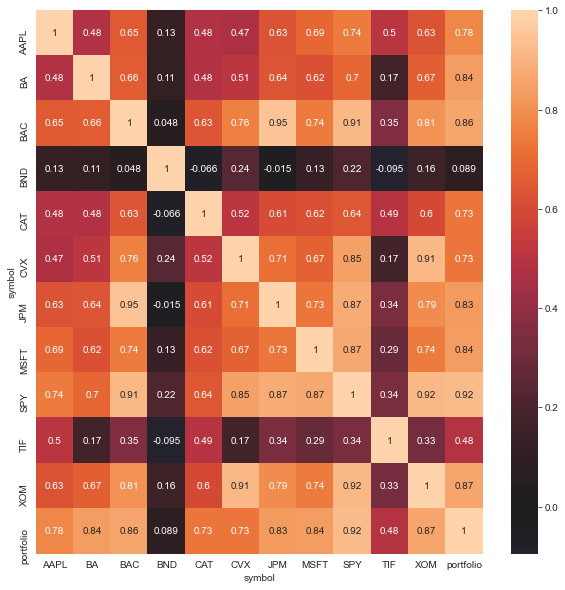

In [13]:
import seaborn as sns
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(ax=ax, data=df_corr, center=0, annot=True)

### 5.5 Markowitz

In [14]:
for l in markowitz:
    print(l['name'])
    print(l['weights'])
    print('\n')

Minimum variance portfolio
symbol
AAPL    6.648165e-11
BA      4.138511e-11
BAC     2.738030e-10
BND     9.736285e-01
CAT     1.286203e-02
CVX     3.572508e-11
JPM     3.938554e-03
MSFT    6.615183e-10
TIF     9.570914e-03
XOM     5.064078e-11
dtype: float64


Target: more than 50% of stock returns
symbol
AAPL    6.440468e-11
BA      3.811872e-11
BAC     2.712212e-10
BND     9.736285e-01
CAT     1.286203e-02
CVX     3.377226e-11
JPM     3.938555e-03
MSFT    6.809876e-10
TIF     9.570914e-03
XOM     4.838471e-11
dtype: float64


Target: more than 75% of stock returns
symbol
AAPL    6.452477e-11
BA      3.864678e-11
BAC     2.705161e-10
BND     9.736285e-01
CAT     1.286203e-02
CVX     3.410858e-11
JPM     3.938555e-03
MSFT    6.709637e-10
TIF     9.570914e-03
XOM     4.885041e-11
dtype: float64


Target: more than 90% of stock returns
symbol
AAPL   -3.887644e-10
BA     -3.413824e-10
BAC    -1.437104e-10
BND     1.143824e-01
CAT    -1.516481e-10
CVX    -1.967346e-10
JPM     7.868181e-11
